### NLP Group Assignment 

#### Domestic Violence twitter data 

#### Sentiment Analysis on twieets from 28th of April 2019 until 28th of March 2020 related to the topic of domestic violence

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Matplotlib conf
import matplotlib.pyplot as plt
from matplotlib import interactive
%matplotlib inline

# Seaborn conf
import seaborn as sns
sns.set_palette(sns.color_palette("seismic"))

# Needed Libraries
import sys
import pandas
import pandas as pd
import numpy as np
import operator
import string
import re

from matplotlib import pyplot

import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from datetime import datetime

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit
from PIL import Image


In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install wordcloud

     |████████████████████████████████| 160 kB 875 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
general_tweets = pandas.read_csv("Mentions_day.csv", quotechar='"', header=0, sep=",")

In [24]:
general_tweets

,Date,Tweets_Mentions
0,2019-05-05,737
1,2019-05-06,686
2,2019-05-07,867
3,2019-05-08,950
4,2019-05-09,1205
...,...,...
360,2020-04-29,26005
361,2020-04-30,31752
362,2020-05-01,34750
363,2020-05-02,22776


In [27]:
general_tweets.dtypes

Date                object
 Tweets_Mentions     int64
dtype: object

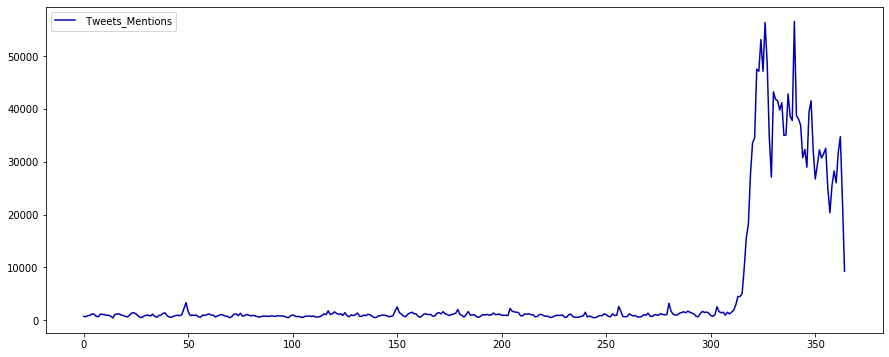

In [46]:
general_tweets.plot(figsize=(15, 6))
plt.show()

As we can see in this graph the peak of the tweets happened towards the end this is why we focus in the rest of the analysis on data from the end of February until the end of April 2020 (during the covid-19 outbreak).

### 4 files for tweets using different hashtags related to domestic violence

Hashtags used for every file
- 1 = METOO
- 2 = WHYISTAYED  WHYILEFT
- 3 = HeForSheAtHome  WomenCount  GenerationEquality  AntiDomesticViolenceDuringEpidemic  Mask-19  WithHer  SpotlightEndViolence
- 4 = staysafe domesticviolence DomesticAbuse DomesticViolence

In [3]:
DV_twitter1 = pandas.read_csv("TWITTER1.csv", quotechar='"', header=0, sep=",")
DV_twitter2 = pandas.read_csv("TWITTER2.csv", quotechar='"', header=0, sep=",")
DV_twitter3 = pandas.read_csv("TWITTER3.csv", quotechar='"', header=0, sep=",")
DV_twitter4 = pandas.read_csv("TWITTER4.csv", quotechar='"', header=0, sep=",")

In [4]:
DV_twitter1.columns

Index(['No', 'Source', 'Host', 'Link', 'Date(ET)', 'Time(ET)', 'LocalTime',
       'Category', 'Author ID', 'Author Name', 'Author URL', 'Authority',
       'Followers', 'Following', 'Age', 'Gender', 'Language', 'Country',
       'Province/State', 'City', 'Location', 'Sentiment', 'Themes',
       'Classifications', 'Entities', 'Alexa Rank', 'Alexa Reach', 'Title',
       'Snippet', 'Contents', 'Summary', 'Bio', 'Unique ID', 'Post Source'],
      dtype='object')

In [5]:
DV_twitter1.drop(['No', 'Source','Host','Link','Time(ET)','LocalTime','Category','Author URL','Authority','Age','Location','Sentiment','Themes','Classifications','Entities','Alexa Rank','Alexa Reach','Title','Snippet','Summary','Bio','Unique ID','Post Source'], axis=1, inplace=True)

In [6]:
DV_twitter2.drop(['No', 'Source','Host','Link','Time(ET)','LocalTime','Category','Author URL','Authority','Age','Location','Sentiment','Themes','Classifications','Entities','Alexa Rank','Alexa Reach','Title','Snippet','Summary','Bio','Unique ID','Post Source'], axis=1, inplace=True)

In [7]:
DV_twitter3.drop(['No', 'Source','Host','Link','Time(ET)','LocalTime','Category','Author URL','Authority','Age','Location','Sentiment','Themes','Classifications','Entities','Alexa Rank','Alexa Reach','Title','Snippet','Summary','Bio','Unique ID','Post Source'], axis=1, inplace=True)

In [8]:
DV_twitter4.drop(['No', 'Source','Host','Link','Time(ET)','LocalTime','Category','Author URL','Authority','Age','Location','Sentiment','Themes','Classifications','Entities','Alexa Rank','Alexa Reach','Title','Snippet','Summary','Bio','Unique ID','Post Source'], axis=1, inplace=True)

In [35]:
DV_twitter1.shape

(3000, 11)

In [45]:
DV_twitter2.shape

(2581, 11)

In [11]:
DV_twitter3.shape

(50000, 11)

In [12]:
DV_twitter4.shape

(50000, 11)

In [13]:
merged_tweets = pd.concat([DV_twitter1, DV_twitter2,DV_twitter3,DV_twitter4], axis=0,ignore_index=True)

In [16]:
merged_tweets.shape

(105581, 11)

we have 105,581 tweets to analyze

In [33]:
merged_tweets.head()

,Date(ET),Author ID,Author Name,Followers,Following,Gender,Language,Country,Province/State,City,...,char_count,punctuation_count,hashtag_count,mention_count,scores,compound,negtive,postive,neutral,sentiment
0,1/30/20,tobeeverything,borrowed energy,141,4738,NaN,English,NaN,NaN,NaN,...,273,25,1,3,"{'neg': 0.167, 'neu': 0.727, 'pos': 0.107, 'co...",-0.2422,0.167,0.107,0.727,negative
1,1/30/20,rhondas_lil_sis,mom of 3 teens,324,403,FEMALE,English,USA,mo,NaN,...,17,3,1,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral
2,1/5/20,HarvardHBS,Harvard Business,504297,2117,NaN,English,USA,ma,boston,...,173,16,1,1,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...",0.4019,0.000,0.137,0.863,positive
3,1/25/20,reginaannfaith,Regina Ann Faith,2778,3710,FEMALE,English,USA,va,virginia beach,...,286,16,7,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral
4,1/30/20,dbrew101,Diane Brewer #FakePrezIsTheThreatToAmerics🆘🆘,5575,5884,FEMALE,English,USA,fl,NaN,...,321,23,6,2,"{'neg': 0.215, 'neu': 0.711, 'pos': 0.074, 'co...",-0.8291,0.215,0.074,0.711,negative


In [15]:
merged_tweets.isnull().sum()

Date(ET)              0
Author ID             0
Author Name           1
Followers             0
Following             0
Gender            45399
Language              0
Country           43183
Province/State    58573
City              68680
Contents              0
dtype: int64

In [17]:
# Data Cleaning Functions:

def decontracted(phrase):
    """
    Function uses regular expression to substitute common constructs used in text which 
    involve contractions.
    A contraction is a shortened form of one or two words (one of which is usually a verb).
    e.g. 'won't' will be replaced with 'will not'

    parameters:
    text (str): the text to use
    """ 
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'didnt", " did not", phrase)
    return phrase

# Removing URL
def remove_Links(text):
    Link = re.compile(r'https?://\S+|www\.\S+')
    return Link.sub(r'',text)

# Removing stopwords and doing lemmazization and stemming 

def process_text(raw_text): 
    words = raw_text.split()
    stops = set(stopwords.words("english")) 
    not_stop_words = [w for w in words if not w in stops]
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in not_stop_words]
    
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in lemmatized]
    
    return( " ".join( stemmed ))  

In [18]:
# word_count
merged_tweets['word_count'] = merged_tweets['Contents'].apply(lambda x: len(str(x).split()))

# unique_word_count
merged_tweets['unique_word_count'] = merged_tweets['Contents'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
merged_tweets['stop_word_count'] = merged_tweets['Contents'].apply(lambda x: len([w for w in str(x).lower().split() if w in nltk.corpus.stopwords.words("english")]))


# url_count
merged_tweets['url_count'] = merged_tweets['Contents'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))


# mean_word_length
merged_tweets['mean_word_length'] = merged_tweets['Contents'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


# char_count
merged_tweets['char_count'] = merged_tweets['Contents'].apply(lambda x: len(str(x)))


# punctuation_count
merged_tweets['punctuation_count'] = merged_tweets['Contents'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


# hashtag_count
merged_tweets['hashtag_count'] = merged_tweets['Contents'].apply(lambda x: len([c for c in str(x) if c == '#']))


# mention_count
merged_tweets['mention_count'] = merged_tweets['Contents'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [19]:
merged_tweets.head()

,Date(ET),Author ID,Author Name,Followers,Following,Gender,Language,Country,Province/State,City,Contents,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,1/30/20,tobeeverything,borrowed energy,141,4738,NaN,English,NaN,NaN,NaN,QT @CNBC: RT @sannewman: Weird how no one asks...,42,34,11,2,5.523810,273,25,1,3
1,1/30/20,rhondas_lil_sis,mom of 3 teens,324,403,FEMALE,English,USA,mo,NaN,@BrenXoxo_ #MeToo,2,2,0,0,8.000000,17,3,1,1
2,1/5/20,HarvardHBS,Harvard Business,504297,2117,NaN,English,USA,ma,boston,How the #MeToo movement cracked Drew Dixon's (...,22,22,3,2,6.909091,173,16,1,1
3,1/25/20,reginaannfaith,Regina Ann Faith,2778,3710,FEMALE,English,USA,va,virginia beach,@SerenaHassan4 Two college age artists who eac...,37,36,12,1,6.756757,286,16,7,1
4,1/30/20,dbrew101,Diane Brewer #FakePrezIsTheThreatToAmerics🆘🆘,5575,5884,FEMALE,English,USA,fl,NaN,"QT @mog7546: RT @SassySwift1: Hey #KenStarr, d...",55,51,19,1,4.854545,321,23,6,2


## Processing the text data in the merged file 

In [20]:
merged_tweets['Contents']=merged_tweets['Contents'].apply(lambda x : remove_Links(x))
merged_tweets['Contents']=merged_tweets['Contents'].apply(lambda x : decontracted(x))
merged_tweets['Contents']=merged_tweets['Contents'].apply(lambda x : process_text(x))

In [96]:
DV_twitter4['Contents']=DV_twitter4['Contents'].apply(lambda x : remove_Links(x))
DV_twitter4['Contents']=DV_twitter4['Contents'].apply(lambda x : decontracted(x))
DV_twitter4['Contents']=DV_twitter4['Contents'].apply(lambda x : process_text(x))

In [147]:
DV_twitter2['Contents']=DV_twitter2['Contents'].apply(lambda x : remove_Links(x))
DV_twitter2['Contents']=DV_twitter2['Contents'].apply(lambda x : decontracted(x))
DV_twitter2['Contents']=DV_twitter2['Contents'].apply(lambda x : process_text(x))

In [21]:
merged_tweets['Contents']

0         QT @cnbc: RT @sannewman: weird one ask woman a...
1                                         @brenxoxo_ #metoo
2         how #metoo movement crack drew dixon (mba 2004...
3         @serenahassan4 two colleg age artist go trauma...
4         QT @mog7546: RT @sassyswift1: hey #kenstarr, d...
                                ...                        
105576    RT @crimestoppersuk: We seen 49% surg inform p...
105577    RT @aolswamiji: today ( april 17 th) 6.30 pm i...
105578    .@themamafesto plz read: “the link between #do...
105579    consent skill; get better practic our hotlin o...
105580    .@sethmoulton plz read: “the link between #dom...
Name: Contents, Length: 105581, dtype: object

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [98]:
DV_twitter4['scores'] = DV_twitter4['Contents'].apply(lambda contents: analyser.polarity_scores(contents))

In [148]:
DV_twitter2['scores'] = DV_twitter2['Contents'].apply(lambda contents: analyser.polarity_scores(contents))

In [ ]:
merged_tweets['scores'] = merged_tweets['Contents'].apply(lambda contents: analyser.polarity_scores(contents))

In [25]:
merged_tweets['compound'] = merged_tweets['scores'].apply(lambda score_dict: score_dict['compound'])
merged_tweets['negtive']  = merged_tweets['scores'].apply(lambda score_dict: score_dict['neg'])
merged_tweets['postive']  = merged_tweets['scores'].apply(lambda score_dict: score_dict['pos'])
merged_tweets['neutral']  = merged_tweets['scores'].apply(lambda score_dict: score_dict['neu'])

In [99]:
DV_twitter4['compound'] = DV_twitter4['scores'].apply(lambda score_dict: score_dict['compound'])
DV_twitter4['negtive']  = DV_twitter4['scores'].apply(lambda score_dict: score_dict['neg'])
DV_twitter4['postive']  = DV_twitter4['scores'].apply(lambda score_dict: score_dict['pos'])
DV_twitter4['neutral']  = DV_twitter4['scores'].apply(lambda score_dict: score_dict['neu'])

In [149]:
DV_twitter2['compound'] = DV_twitter2['scores'].apply(lambda score_dict: score_dict['compound'])
DV_twitter2['negtive']  = DV_twitter2['scores'].apply(lambda score_dict: score_dict['neg'])
DV_twitter2['postive']  = DV_twitter2['scores'].apply(lambda score_dict: score_dict['pos'])
DV_twitter2['neutral']  = DV_twitter2['scores'].apply(lambda score_dict: score_dict['neu'])

In [27]:
def sentiment_value (score):
    if score >= 0.05:
        return 'positive'
    elif (score > -0.05) and (score < 0.05):
        return 'neutral'
    else:
        return 'negative'

In [28]:
merged_tweets['sentiment'] = merged_tweets['compound'].apply(sentiment_value)

In [100]:
DV_twitter4['sentiment'] = DV_twitter4['compound'].apply(sentiment_value)

In [150]:
DV_twitter2['sentiment'] = DV_twitter2['compound'].apply(sentiment_value)

In [30]:
merged_tweets.head()

,Date(ET),Author ID,Author Name,Followers,Following,Gender,Language,Country,Province/State,City,...,char_count,punctuation_count,hashtag_count,mention_count,scores,compound,negtive,postive,neutral,sentiment
0,1/30/20,tobeeverything,borrowed energy,141,4738,NaN,English,NaN,NaN,NaN,...,273,25,1,3,"{'neg': 0.167, 'neu': 0.727, 'pos': 0.107, 'co...",-0.2422,0.167,0.107,0.727,negative
1,1/30/20,rhondas_lil_sis,mom of 3 teens,324,403,FEMALE,English,USA,mo,NaN,...,17,3,1,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral
2,1/5/20,HarvardHBS,Harvard Business,504297,2117,NaN,English,USA,ma,boston,...,173,16,1,1,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...",0.4019,0.000,0.137,0.863,positive
3,1/25/20,reginaannfaith,Regina Ann Faith,2778,3710,FEMALE,English,USA,va,virginia beach,...,286,16,7,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral
4,1/30/20,dbrew101,Diane Brewer #FakePrezIsTheThreatToAmerics🆘🆘,5575,5884,FEMALE,English,USA,fl,NaN,...,321,23,6,2,"{'neg': 0.215, 'neu': 0.711, 'pos': 0.074, 'co...",-0.8291,0.215,0.074,0.711,negative


In [31]:
merged_tweets['sentiment'].value_counts()

positive    58309
negative    29468
neutral     17804
Name: sentiment, dtype: int64

In [101]:
def word_cloud(df, col_name,size=13): 
    text = df[col_name].values 

    comment_words = ' '
    stopwords = set(STOPWORDS) 
    #add custom stopwords
    stopwords = stopwords.union({'domestic', 'violence', 'abuse'})
  # iterate through the csv file
    for val in df[col_name]:
        # typecaste each val to string 
        val = str(val) 
        # split the value 
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        for words in tokens:
            comment_words = comment_words + words + ' '  
            
    def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
        return "hsl(0, 0%%, %d%%)" % np.random.randint(60, 100)

    custom_mask = np.array(Image.open("pic3.png"))

    wc = WordCloud(background_color="black", max_words=1000, mask=custom_mask,
               stopwords=stopwords,contour_width=3, contour_color='#b39eb5')
    # generate word cloud
    wc.generate(str(comment_words))
    wc.recolor(color_func = grey_color_func)
    #plot
    fig = plt.figure(figsize=(size, size))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    plt.show()


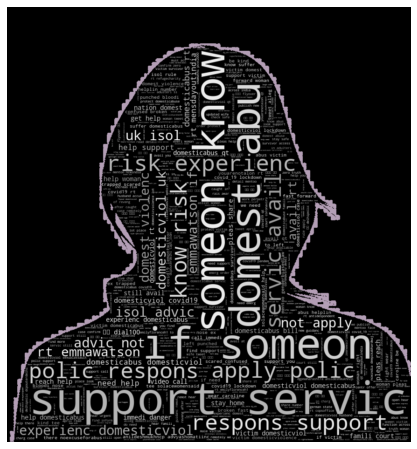

In [102]:
word_cloud(DV_twitter4[DV_twitter4.sentiment == 'positive'],"Contents",8)

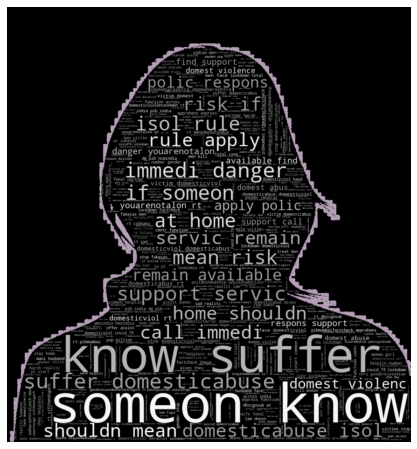

In [146]:
word_cloud(DV_twitter4[DV_twitter4.sentiment == 'negative'],"Contents",8)

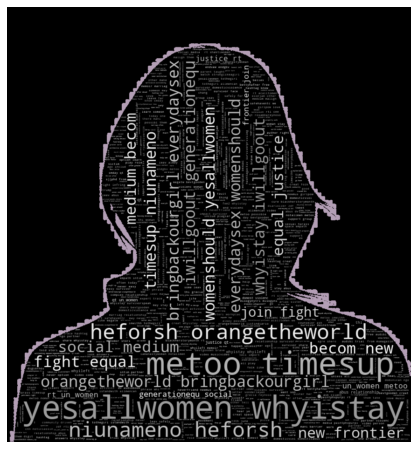

In [151]:
word_cloud(DV_twitter2[DV_twitter2.sentiment == 'positive'],"Contents",8)

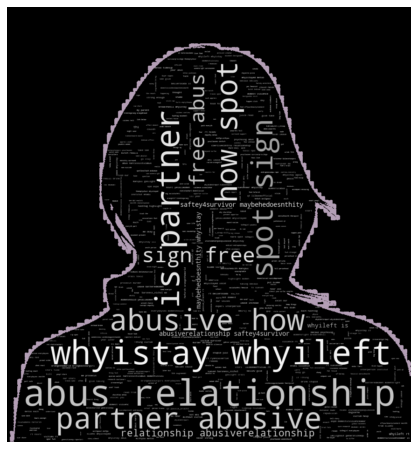

In [152]:
word_cloud(DV_twitter2[DV_twitter2.sentiment == 'negative'],"Contents",8)

We can see here that the wordclouds for twitter data based on the sentiments is not vert insightful mainly because of the short and unformal sentences used in twitter. The type of lamguage used on twitter is not very structured so it is hard to get a lot of insights just using the sentiment analsyis and word cloud that is why we go further into using topic modelling to get better insights.

### Check the top 5 countries with the most positive/negative tweets in order to be able to see which countries are the most engaged in the conversation of DV on twitter this past year

In [143]:
Countries_sentimentP = (
    merged_tweets
    .query('sentiment=="positive"')
    .groupby("Country")
    .count()
    [["sentiment"]]
    .rename(columns={"sentiment": "SentimentP_count"})
    .sort_values(by=['SentimentP_count'],ascending=False)
)

Countries_sentimentP.head()

,SentimentP_count
Country,
UK,9307
USA,6657
India,3568
Kenya,1787
Nigeria,1755


In [145]:
Countries_sentimentN = (
    merged_tweets
    .query('sentiment=="negative"')
    .groupby("Country")
    .count()
    [["sentiment"]]
    .rename(columns={"sentiment": "SentimentN_count"})
    .sort_values(by=['SentimentN_count'],ascending=False)
)
Countries_sentimentN.head()

,SentimentN_count
Country,
UK,5004
USA,3218
India,2979
Canada,715
Nigeria,644


In [172]:
Countries_sentimentN = (
    merged_tweets
    .query('sentiment=="neutral"')
    .groupby("Country")
    .count()
    [["sentiment"]]
    .rename(columns={"sentiment": "SentimentN_count"})
    .sort_values(by=['SentimentN_count'],ascending=False)
)

Countries_sentimentP.head()

,SentimentP_count
Country,
UK,9307
USA,6657
India,3568
Kenya,1787
Nigeria,1755


No matter the sentiment, the top 5 countries are still the same: UK, USA, INDIA, KENYA, NIGERIA which means these are the top countries that are engaging in social media about the domestic violence discussions

In the next notebooks we will be applying LDA in order to understand the topics clusters we have in our tweets and in different countries of these top 5 countries we found here.